In [1]:
import json
import urllib
import json
import pandas as pd
pd.options.mode.chained_assignment = None 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import numpy as np
import operator

In [28]:
def Q1_1(json_file_path, start_date, end_date):
    str=start_date
    str1=end_date
    
#     Converting the Date into processable format and checking valid date range
    if(len(str)!=10 and len(str1)!=10):
        print("Invalid Date Format")
        return
    year_1=""
    month_1=""
    day_1=""
    year_2=""
    month_2=""
    day_2=""

    for i in range(0,2):
        year_1=year_1+str[i]
        year_2=year_2+str1[i]
    for i in range(5,7):
        month_1=month_1+str[i]
        month_2=month_2+str1[i]
    for i in range(8,10):
        day_1=day_1+str[i]
        day_2=day_2+str1[i]
    if(int(month_1)==int(month_2)):
        if(int(day_1)>=int(day_2)):
            print("Date Range not Valid")
            return
    else:
        if(int(month_1)>int(month_2)):
            print("Date Range not Valid")
            return
    dict_month={"01":"Jan","02":"Feb","03":"Mar","04":"Apr","05":"May","06":"Jun","07":"Jul","08":"Aug","09":"Sep","10":"Oct","11":"Nov","12":"Dec",}
    start_date=day_1+"-"+dict_month[month_1]+"-"+year_1
    end_date=day_2+"-"+dict_month[month_2]+"-"+year_2
                
    
    
    
    
    
#     Reading the json file
#     Preprocessing of the data set and creating dictionary for the required counts for each date.
#     import urllib, json
#     import urllib.request

#     responce=urllib.request.urlopen("https://api.covid19india.org/states_daily.json")
#     data = json.loads(responce.read())
#     url = "https://api.covid19india.org/states_daily.json"
#     response = urllib.urlopen(url)
    f = open(json_file_path,)
    data = json.load(f)
    first=[]
    confirmed={}
    recovered={}
    deceased={}
    for i in data:
        first=data[i]
    for x in range(len(first)):
        sum=0
#         for d in first[x]:
            
#             if(d!="date" and d!="status" and d!="tt"):
        val=first[x]["tt"]
        sum+=int(val)
        if(first[x]["status"]=="Confirmed"):
            confirmed[first[x]["date"]]=sum
        elif(first[x]["status"]=="Recovered"):
            recovered[first[x]["date"]]=sum
        else:
            deceased[first[x]["date"]]=sum
    
    con=0
    rec=0
    des=0
    flag=0
    for i in confirmed:
        if(i==start_date):
            flag=1
        if(i==end_date):
            con+=confirmed[i]
            rec+=recovered[i]
            des+=deceased[i]
            break

        if(flag==1):
            con+=confirmed[i]
            rec+=recovered[i]
            des+=deceased[i]
#     print("confirmed cases->",con)
#     print("recovered cases->",rec)
#     print("deceased cases->",des)
    print('confirmed_count:',con, '\nrecovered_count:',rec, '\ndeceased_count:',des)
    return con, rec, des

In [4]:
def Q1_2(json_file_path, start_date, end_date):
    str=start_date
    str1=end_date
    
#     Converting the Date into processable format and checking valid date range
    if(len(str)!=10 and len(str1)!=10):
        print("Invalid Date Format")
        return
    year_1=""
    month_1=""
    day_1=""
    year_2=""
    month_2=""
    day_2=""

    for i in range(0,2):
        year_1=year_1+str[i]
        year_2=year_2+str1[i]
    for i in range(5,7):
        month_1=month_1+str[i]
        month_2=month_2+str1[i]
    for i in range(8,10):
        day_1=day_1+str[i]
        day_2=day_2+str1[i]
    if(int(month_1)==int(month_2)):
        if(int(day_1)>=int(day_2)):
            print("Date Range not Valid")
            return
    else:
        if(int(month_1)>int(month_2)):
            print("Date Range not Valid")
            return
    dict_month={"01":"Jan","02":"Feb","03":"Mar","04":"Apr","05":"May","06":"Jun","07":"Jul","08":"Aug","09":"Sep","10":"Oct","11":"Nov","12":"Dec",}
    start_date=day_1+"-"+dict_month[month_1]+"-"+year_1
    end_date=day_2+"-"+dict_month[month_2]+"-"+year_2
                
    
    
    
    
    
#     Reading the json file
#     Preprocessing of the data set and creating dictionary for the required counts for each date.
    f = open(json_file_path,)
    data = json.load(f)
    first=[]
    confirmed={}
    recovered={}
    deceased={}
    Con_date_state={}
    Rec_date_state={}
    Des_date_state={}
    
    for i in data:
        first=data[i]
    for x in range(len(first)):
        state_dict={}
        sum1=0
        for d in first[x]:
                        
            if(d!="date" and d!="status" and d!="tt"):
                val=int(first[x][d])
                sum1+=val
                state_dict[d]=val
            
        if(first[x]["status"]=="Confirmed"):
            confirmed[first[x]["date"]]=sum1
            Con_date_state[first[x]["date"]]=state_dict
        elif(first[x]["status"]=="Recovered"):
            recovered[first[x]["date"]]=sum1
            Rec_date_state[first[x]["date"]]=state_dict
        else:
            deceased[first[x]["date"]]=sum1
            Des_date_state[first[x]["date"]]=state_dict
    
    con=0
    rec=0
    des=0
    flag=0
    for i in confirmed:
        if(i==start_date):
            flag=1
        if(i==end_date):
            con+=Con_date_state[i]["dl"]
            rec+=Rec_date_state[i]["dl"]
            des+=Des_date_state[i]["dl"]
            break

        if(flag==1):
            con+=Con_date_state[i]["dl"]
            rec+=Rec_date_state[i]["dl"]
            des+=Des_date_state[i]["dl"]

    print('confirmed_count:',con, '\nrecovered_count:',rec, '\ndeceased_count:',des)
    return con, rec, des

In [6]:
def Q1_3(json_file_path, start_date, end_date):
    str=start_date
    str1=end_date
    
#     Converting the Date into processable format and checking valid date range
    if(len(str)!=10 and len(str1)!=10):
        print("Invalid Date Format")
        return
    year_1=""
    month_1=""
    day_1=""
    year_2=""
    month_2=""
    day_2=""

    for i in range(0,2):
        year_1=year_1+str[i]
        year_2=year_2+str1[i]
    for i in range(5,7):
        month_1=month_1+str[i]
        month_2=month_2+str1[i]
    for i in range(8,10):
        day_1=day_1+str[i]
        day_2=day_2+str1[i]
    if(int(month_1)==int(month_2)):
        if(int(day_1)>=int(day_2)):
            print("Date Range not Valid")
            return
    else:
        if(int(month_1)>int(month_2)):
            print("Date Range not Valid")
            return
    dict_month={"01":"Jan","02":"Feb","03":"Mar","04":"Apr","05":"May","06":"Jun","07":"Jul","08":"Aug","09":"Sep","10":"Oct","11":"Nov","12":"Dec",}
    start_date=day_1+"-"+dict_month[month_1]+"-"+year_1
    end_date=day_2+"-"+dict_month[month_2]+"-"+year_2
                
    
    
    
    
    
#     Reading the json file
#     Preprocessing of the data set and creating dictionary for the required counts for each date.
    f = open(json_file_path,)
    data = json.load(f)
    first=[]
    confirmed={}
    recovered={}
    deceased={}
    Con_date_state={}
    Rec_date_state={}
    Des_date_state={}
    
    for i in data:
        first=data[i]
    for x in range(len(first)):
        state_dict={}
        sum1=0
        for d in first[x]:
                        
            if(d!="date" and d!="status" and d!="tt"):
                val=int(first[x][d])
                sum1+=val
                state_dict[d]=val
            
        if(first[x]["status"]=="Confirmed"):
            confirmed[first[x]["date"]]=sum1
            Con_date_state[first[x]["date"]]=state_dict
        elif(first[x]["status"]=="Recovered"):
            recovered[first[x]["date"]]=sum1
            Rec_date_state[first[x]["date"]]=state_dict
        else:
            deceased[first[x]["date"]]=sum1
            Des_date_state[first[x]["date"]]=state_dict
    
    con=0
    rec=0
    des=0
    flag=0
    for i in confirmed:
        if(i==start_date):
            flag=1
        if(i==end_date):
            con+=Con_date_state[i]["dl"]+Con_date_state[i]["mh"]
            rec+=Rec_date_state[i]["dl"]+Rec_date_state[i]["mh"]
            des+=Des_date_state[i]["dl"]+Des_date_state[i]["mh"]
            break

        if(flag==1):
            con+=Con_date_state[i]["dl"]+Con_date_state[i]["mh"]
            rec+=Rec_date_state[i]["dl"]+Rec_date_state[i]["mh"]
            des+=Des_date_state[i]["dl"]+Des_date_state[i]["mh"]

    print('confirmed_count:',con, '\nrecovered_count:',rec, '\ndeceased_count:',des)
    return con, rec, des

In [65]:
def Q1_4(json_file_path, start_date, end_date):
    str=start_date
    str1=end_date
    
#     Converting the Date into processable format and checking valid date range
    if(len(str)!=10 and len(str1)!=10):
        print("Invalid Date Format")
        return
    year_1=""
    month_1=""
    day_1=""
    year_2=""
    month_2=""
    day_2=""

    for i in range(0,2):
        year_1=year_1+str[i]
        year_2=year_2+str1[i]
    for i in range(5,7):
        month_1=month_1+str[i]
        month_2=month_2+str1[i]
    for i in range(8,10):
        day_1=day_1+str[i]
        day_2=day_2+str1[i]
    if(int(month_1)==int(month_2)):
        if(int(day_1)>=int(day_2)):
            print("Date Range not Valid")
            return
    else:
        if(int(month_1)>int(month_2)):
            print("Date Range not Valid")
            return
    dict_month={"01":"Jan","02":"Feb","03":"Mar","04":"Apr","05":"May","06":"Jun","07":"Jul","08":"Aug","09":"Sep","10":"Oct","11":"Nov","12":"Dec",}
    start_date=day_1+"-"+dict_month[month_1]+"-"+year_1
    end_date=day_2+"-"+dict_month[month_2]+"-"+year_2
                
    
    
    
    
    
#     Reading the json file
#     Preprocessing of the data set and creating dictionary for the required counts for each date.
    f = open(json_file_path,)
    data = json.load(f)
    first=[]
    states=[]
    confirmed={}
    recovered={}
    deceased={}
    Con_date_state={}
    Rec_date_state={}
    Des_date_state={}
    
    for i in data:
        first=data[i]
    for x in range(len(first)):
        state_dict={}
        sum1=0
        for d in first[x]:
            
                        
            if(d!="date" and d!="status" and d!="tt"):
                if d not in states:
                    states.append(d)
                val=int(first[x][d])
                sum1+=val
                state_dict[d]=val
            
        if(first[x]["status"]=="Confirmed"):
            confirmed[first[x]["date"]]=sum1
            Con_date_state[first[x]["date"]]=state_dict
        elif(first[x]["status"]=="Recovered"):
            recovered[first[x]["date"]]=sum1
            Rec_date_state[first[x]["date"]]=state_dict
        else:
            deceased[first[x]["date"]]=sum1
            Des_date_state[first[x]["date"]]=state_dict
    
    con=0
    rec=0
    des=0
    flag=0
    con_state={}
    rec_state={}
    des_state={}
    
    for i in confirmed:
        if(i==start_date):
            flag=1
        if(i==end_date):
            for s in states:
                if s not in con_state:
                    con_state[s]=Con_date_state[i][s]
                else:
                    con_state[s]+=Con_date_state[i][s]
                    
                if s not in rec_state:
                    rec_state[s]=Rec_date_state[i][s]
                else:
                    rec_state[s]+=Rec_date_state[i][s]
                    
                if s not in con_state:
                    des_state[s]=Des_date_state[i][s]
                else:
                    des_state[s]+=Des_date_state[i][s]
                    
            
            break

        if(flag==1):
            for s in states:
                if s not in con_state:
                    con_state[s]=Con_date_state[i][s]
                else:
                    con_state[s]+=Con_date_state[i][s]
                    
                if s not in rec_state:
                    rec_state[s]=Rec_date_state[i][s]
                else:
                    rec_state[s]+=Rec_date_state[i][s]
                    
                if s not in des_state:
                    des_state[s]=Des_date_state[i][s]
                else:
                    des_state[s]+=Des_date_state[i][s]
    con_state = dict( sorted(con_state.items(), key=operator.itemgetter(1),reverse=True))
    rec_state = dict( sorted(rec_state.items(), key=operator.itemgetter(1),reverse=True))
    des_state = dict( sorted(des_state.items(), key=operator.itemgetter(1),reverse=True))
    union_ter=['ld','dl','jk','la','dd','dn','py','ch','an','un']
    for ut in union_ter:
        con_state.pop(ut)
        rec_state.pop(ut)
        des_state.pop(ut)
        
    lcount=0
    lst=[]
    for i in con_state:
        lcount=con_state[i]
        break
    
    for i in con_state:
        if(con_state[i]==lcount):
            lst.append(i)
        elif(con_state[i]!=lcount):
            break
    print('Confirmed')
    print('Lowest affected State is:',[i for i in lst])
    print('Lowest affected State count is:',lcount,"\n")
    
    lcount=0
    lst=[]
    for i in rec_state:
        lcount=rec_state[i]
        break
    
    for i in rec_state:
        if(rec_state[i]==lcount):
            lst.append(i)
        elif(rec_state[i]!=lcount):
            break
    for i in rec_state:
        print('Recovered')
        print('Lowest affected State is:',[i for i in lst])
        print('Lowest affected State count is:',lcount,"\n")
        break
        
    lcount=0
    lst=[]
    for i in des_state:
        lcount=des_state[i]
        break
    
    for i in des_state:
        if(des_state[i]==lcount):
            lst.append(i)
        elif(des_state[i]!=lcount):
            break
    for i in des_state:
        print('Deceased')
        print('Lowest affected State is:',[i for i in lst])
        print('Lowest affected State count is:',lcount)
        break
    

#     print('confirmed_count:',con_state[0], '\nrecovered_count:',rec_state[0], '\ndeceased_count:',des_state[0])
#     print(Rec_date_state["23-Mar-20"]["hr"])

In [74]:
def Q1_5(json_file_path, start_date, end_date):
    str=start_date
    str1=end_date
    
#     Converting the Date into processable format and checking valid date range
    if(len(str)!=10 and len(str1)!=10):
        print("Invalid Date Format")
        return
    year_1=""
    month_1=""
    day_1=""
    year_2=""
    month_2=""
    day_2=""

    for i in range(0,2):
        year_1=year_1+str[i]
        year_2=year_2+str1[i]
    for i in range(5,7):
        month_1=month_1+str[i]
        month_2=month_2+str1[i]
    for i in range(8,10):
        day_1=day_1+str[i]
        day_2=day_2+str1[i]
    if(int(month_1)==int(month_2)):
        if(int(day_1)>=int(day_2)):
            print("Date Range not Valid")
            return
    else:
        if(int(month_1)>int(month_2)):
            print("Date Range not Valid")
            return
    dict_month={"01":"Jan","02":"Feb","03":"Mar","04":"Apr","05":"May","06":"Jun","07":"Jul","08":"Aug","09":"Sep","10":"Oct","11":"Nov","12":"Dec",}
    start_date=day_1+"-"+dict_month[month_1]+"-"+year_1
    end_date=day_2+"-"+dict_month[month_2]+"-"+year_2
                
    
    
    
    
    
#     Reading the json file
#     Preprocessing of the data set and creating dictionary for the required counts for each date.
    f = open(json_file_path,)
    data = json.load(f)
    first=[]
    states=[]
    confirmed={}
    recovered={}
    deceased={}
    Con_date_state={}
    Rec_date_state={}
    Des_date_state={}
    
    for i in data:
        first=data[i]
    for x in range(len(first)):
        state_dict={}
        sum1=0
        for d in first[x]:
            
                        
            if(d!="date" and d!="status" and d!="tt"):
                if d not in states:
                    states.append(d)
                val=int(first[x][d])
                sum1+=val
                state_dict[d]=val
            
        if(first[x]["status"]=="Confirmed"):
            confirmed[first[x]["date"]]=sum1
            Con_date_state[first[x]["date"]]=state_dict
        elif(first[x]["status"]=="Recovered"):
            recovered[first[x]["date"]]=sum1
            Rec_date_state[first[x]["date"]]=state_dict
        else:
            deceased[first[x]["date"]]=sum1
            Des_date_state[first[x]["date"]]=state_dict
    
    con=0
    rec=0
    des=0
    flag=0
    con_state={}
    rec_state={}
    des_state={}
    
    for i in confirmed:
        if(i==start_date):
            flag=1
        if(i==end_date):
            for s in states:
                if s not in con_state:
                    con_state[s]=Con_date_state[i][s]
                else:
                    con_state[s]+=Con_date_state[i][s]
                    
                if s not in rec_state:
                    rec_state[s]=Rec_date_state[i][s]
                else:
                    rec_state[s]+=Rec_date_state[i][s]
                    
                if s not in con_state:
                    des_state[s]=Des_date_state[i][s]
                else:
                    des_state[s]+=Des_date_state[i][s]
                    
            
            break

        if(flag==1):
            for s in states:
                if s not in con_state:
                    con_state[s]=Con_date_state[i][s]
                else:
                    con_state[s]+=Con_date_state[i][s]
                    
                if s not in rec_state:
                    rec_state[s]=Rec_date_state[i][s]
                else:
                    rec_state[s]+=Rec_date_state[i][s]
                    
                if s not in des_state:
                    des_state[s]=Des_date_state[i][s]
                else:
                    des_state[s]+=Des_date_state[i][s]
    con_state = dict( sorted(con_state.items(), key=operator.itemgetter(1),reverse=False))
    rec_state = dict( sorted(rec_state.items(), key=operator.itemgetter(1),reverse=False))
    des_state = dict( sorted(des_state.items(), key=operator.itemgetter(1),reverse=False))
    union_ter=['ld','dl','jk','la','dd','dn','py','ch','an','un']
    for ut in union_ter:
        con_state.pop(ut)
        rec_state.pop(ut)
        des_state.pop(ut)
    
    
    lcount=0
    lst=[]
    for i in con_state:
        lcount=con_state[i]
        break
    
    for i in con_state:
        if(con_state[i]==lcount):
            lst.append(i)
        elif(con_state[i]!=lcount):
            break
    print('Confirmed')
    print('Lowest affected State is:',[i for i in lst])
    print('Lowest affected State count is:',lcount,"\n")
    
    lcount=0
    lst=[]
    for i in rec_state:
        lcount=rec_state[i]
        break
    
    for i in rec_state:
        if(rec_state[i]==lcount):
            lst.append(i)
        elif(rec_state[i]!=lcount):
            break
    for i in rec_state:
        print('Recovered')
        print('Lowest affected State is:',[i for i in lst])
        print('Lowest affected State count is:',lcount,"\n")
        break
        
    lcount=0
    lst=[]
    for i in des_state:
        lcount=des_state[i]
        break
    
    for i in des_state:
        if(des_state[i]==lcount):
            lst.append(i)
        elif(des_state[i]!=lcount):
            break
    for i in des_state:
        print('Deceased')
        print('Lowest affected State is:',[i for i in lst])
        print('Lowest affected State count is:',lcount)
        break


In [12]:
def Q1_6(json_file_path, start_date, end_date):
    str=start_date
    str1=end_date
    
#     Converting the Date into processable format and checking valid date range
    if(len(str)!=10 and len(str1)!=10):
        print("Invalid Date Format")
        return
    year_1=""
    month_1=""
    day_1=""
    year_2=""
    month_2=""
    day_2=""

    for i in range(0,2):
        year_1=year_1+str[i]
        year_2=year_2+str1[i]
    for i in range(5,7):
        month_1=month_1+str[i]
        month_2=month_2+str1[i]
    for i in range(8,10):
        day_1=day_1+str[i]
        day_2=day_2+str1[i]
    if(int(month_1)==int(month_2)):
        if(int(day_1)>=int(day_2)):
            print("Date Range not Valid")
            return
    else:
        if(int(month_1)>int(month_2)):
            print("Date Range not Valid")
            return
    dict_month={"01":"Jan","02":"Feb","03":"Mar","04":"Apr","05":"May","06":"Jun","07":"Jul","08":"Aug","09":"Sep","10":"Oct","11":"Nov","12":"Dec",}
    start_date=day_1+"-"+dict_month[month_1]+"-"+year_1
    end_date=day_2+"-"+dict_month[month_2]+"-"+year_2
                
    
    
    
    
    
#     Reading the json file
#     Preprocessing of the data set and creating dictionary for the required counts for each date.
    f = open(json_file_path,)
    data = json.load(f)
    first=[]
    states=[]
    confirmed={}
    recovered={}
    deceased={}
    Con_date_state={}
    Rec_date_state={}
    Des_date_state={}
    
    for i in data:
        first=data[i]
    for x in range(len(first)):
        state_dict={}
        sum1=0
        for d in first[x]:
            
                        
            if(d!="date" and d!="status" and d!="tt"):
                if d not in states:
                    states.append(d)
                val=int(first[x][d])
                sum1+=val
                state_dict[d]=val
            
        if(first[x]["status"]=="Confirmed"):
            confirmed[first[x]["date"]]=sum1
            Con_date_state[first[x]["date"]]=state_dict
        elif(first[x]["status"]=="Recovered"):
            recovered[first[x]["date"]]=sum1
            Rec_date_state[first[x]["date"]]=state_dict
        else:
            deceased[first[x]["date"]]=sum1
            Des_date_state[first[x]["date"]]=state_dict
    
    con=0
    rec=0
    des=0
    flag=0
    con_state={}
    rec_state={}
    des_state={}
    max_con=0
    max_con_date=""
    max_rec=0
    max_rec_date=""
    max_des=0
    max_des_date=""
    
    
    for i in confirmed:
        if(i==start_date):
            flag=1
        if(i==end_date):
            if(Con_date_state[i]["dl"]>max_con):
                max_con=Con_date_state[i]["dl"]
                max_con_date=i
            if(Rec_date_state[i]["dl"]>max_rec):
                max_rec=Rec_date_state[i]["dl"]
                max_rec_date=i
            if(Des_date_state[i]["dl"]>max_des):
                max_des=Des_date_state[i]["dl"]
                max_des_date=i
            break
        if(flag==1):
            if(Con_date_state[i]["dl"]>max_con):
                max_con=Con_date_state[i]["dl"]
                max_con_date=i
            if(Rec_date_state[i]["dl"]>max_rec):
                max_rec=Rec_date_state[i]["dl"]
                max_rec_date=i
            if(Des_date_state[i]["dl"]>max_des):
                max_des=Des_date_state[i]["dl"]
                max_des_date=i

    
    print('Confirmed \n')
    print('Day: ',max_con_date)
    print('Count: ',max_con)
    print('Recovered \n')
    print('Day: ',max_rec_date)
    print('Count: ',max_rec)
    print('Deceased \n')
    print('Day: ',max_des_date)
    print('Count: ',max_des)

In [71]:
def Q1_7(json_file_path, start_date, end_date):
    str=start_date
    str1=end_date
    
#     Converting the Date into processable format and checking valid date range
    if(len(str)!=10 and len(str1)!=10):
        print("Invalid Date Format")
        return
    year_1=""
    month_1=""
    day_1=""
    year_2=""
    month_2=""
    day_2=""

    for i in range(0,2):
        year_1=year_1+str[i]
        year_2=year_2+str1[i]
    for i in range(5,7):
        month_1=month_1+str[i]
        month_2=month_2+str1[i]
    for i in range(8,10):
        day_1=day_1+str[i]
        day_2=day_2+str1[i]
    if(int(month_1)==int(month_2)):
        if(int(day_1)>=int(day_2)):
            print("Date Range not Valid")
            return
    else:
        if(int(month_1)>int(month_2)):
            print("Date Range not Valid")
            return
    dict_month={"01":"Jan","02":"Feb","03":"Mar","04":"Apr","05":"May","06":"Jun","07":"Jul","08":"Aug","09":"Sep","10":"Oct","11":"Nov","12":"Dec",}
    start_date=day_1+"-"+dict_month[month_1]+"-"+year_1
    end_date=day_2+"-"+dict_month[month_2]+"-"+year_2
                
    
    
    
    
    
#     Reading the json file
#     Preprocessing of the data set and creating dictionary for the required counts for each date.
    f = open(json_file_path,)
    data = json.load(f)
    first=[]
    states=[]
    confirmed={}
    recovered={}
    deceased={}
    Con_date_state={}
    Rec_date_state={}
    Des_date_state={}
    
    for i in data:
        first=data[i]
    for x in range(len(first)):
        state_dict={}
        sum1=0
        for d in first[x]:
            
                        
            if(d!="date" and d!="status" and d!="tt"):
                if d not in states:
                    states.append(d)
                val=int(first[x][d])
                sum1+=val
                state_dict[d]=val
            
        if(first[x]["status"]=="Confirmed"):
            confirmed[first[x]["date"]]=sum1
            Con_date_state[first[x]["date"]]=state_dict
        elif(first[x]["status"]=="Recovered"):
            recovered[first[x]["date"]]=sum1
            Rec_date_state[first[x]["date"]]=state_dict
        else:
            deceased[first[x]["date"]]=sum1
            Des_date_state[first[x]["date"]]=state_dict
    
    con=0
    rec=0
    des=0
    flag=0
    con_state={}
    rec_state={}
    des_state={}
    
    for i in confirmed:
        if(i==start_date):
            flag=1
        if(i==end_date):
            for s in states:
                if s not in con_state:
                    con_state[s]=Con_date_state[i][s]
                else:
                    con_state[s]+=Con_date_state[i][s]
                    
                if s not in rec_state:
                    rec_state[s]=Rec_date_state[i][s]
                else:
                    rec_state[s]+=Rec_date_state[i][s]
                    
                if s not in con_state:
                    des_state[s]=Des_date_state[i][s]
                else:
                    des_state[s]+=Des_date_state[i][s]
            break

        if(flag==1):
            for s in states:
                if s not in con_state:
                    con_state[s]=Con_date_state[i][s]
                else:
                    con_state[s]+=Con_date_state[i][s]
                    
                if s not in rec_state:
                    rec_state[s]=Rec_date_state[i][s]
                else:
                    rec_state[s]+=Rec_date_state[i][s]
                    
                if s not in des_state:
                    des_state[s]=Des_date_state[i][s]
                else:
                    des_state[s]+=Des_date_state[i][s]
    union_ter=['ld','dl','jk','la','dd','dn','py','ch','an','un']
    for i in con_state:
        if i not in union_ter:
            print("State:",i)
            print('Active Cases:',con_state[i]-(rec_state[i]+des_state[i]),"\n")


In [85]:
def Q2_1(json_file_path, start_date, end_date):
    import pandas as pd
    str=start_date
    str1=end_date
    
#     Converting the Date into processable format and checking valid date range
    if(len(str)!=10 and len(str1)!=10):
        print("Invalid Date Format")
        return
    year_1=""
    month_1=""
    day_1=""
    year_2=""
    month_2=""
    day_2=""

    for i in range(0,2):
        year_1=year_1+str[i]
        year_2=year_2+str1[i]
    for i in range(5,7):
        month_1=month_1+str[i]
        month_2=month_2+str1[i]
    for i in range(8,10):
        day_1=day_1+str[i]
        day_2=day_2+str1[i]
    if(int(month_1)==int(month_2)):
        if(int(day_1)>=int(day_2)):
            print("Date Range not Valid")
            return
    else:
        if(int(month_1)>int(month_2)):
            print("Date Range not Valid")
            return
    dict_month={"01":"Jan","02":"Feb","03":"Mar","04":"Apr","05":"May","06":"Jun","07":"Jul","08":"Aug","09":"Sep","10":"Oct","11":"Nov","12":"Dec",}
    start_date=day_1+"-"+dict_month[month_1]+"-"+year_1
    end_date=day_2+"-"+dict_month[month_2]+"-"+year_2
                
    
    
    
    
    
#     Reading the json file
#     Preprocessing of the data set and creating dictionary for the required counts for each date.
    f = open(json_file_path,)
    data = json.load(f)
    first=[]
    confirmed={}
    recovered={}
    deceased={}
    for i in data:
        first=data[i]
    for x in range(len(first)):
        sum=0
        for d in first[x]:
            
            if(d!="date" and d!="status" and d!="tt"):
                val=first[x][d]
                sum+=int(val)
        if(first[x]["status"]=="Confirmed"):
            confirmed[first[x]["date"]]=sum
        elif(first[x]["status"]=="Recovered"):
            recovered[first[x]["date"]]=sum
        else:
            deceased[first[x]["date"]]=sum
    
    con=0
    rec=0
    des=0
    flag=0
    conf=[]
    recov=[]
    desc=[]
    date=[]
    for i in confirmed:
        if(i==start_date):
            flag=1
        if(i==end_date):
            con+=confirmed[i]
            rec+=recovered[i]
            des+=deceased[i]
            conf.append(con)
            recov.append(rec)
            desc.append(des)
            date.append(i)
            break

        if(flag==1):
            con+=confirmed[i]
            rec+=recovered[i]
            des+=deceased[i]
            conf.append(con)
            recov.append(rec)
            desc.append(des)
            date.append(i)
    
    
    
        

    
    
    import numpy as np
    import matplotlib.pyplot as plt

    
    x=np.array(date)
    conf=np.array(conf)
    recov=np.array(recov)
    desc=np.array(desc)
    df = pd.DataFrame({

        'Confirmed Cases': conf,

        'Recovered Cases': recov,

        'Deceased Cases': desc,

    }, index=x)

    ax=df.plot(kind='area',stacked=False,figsize=(12, 6))

    plt.title('Area Trend for Covid Cases all over India')
    plt.ylabel('Number of Cases')
    plt.xlabel('Dates')
    
    plt.savefig('fig2_1',facecolor="#f2eded")
    plt.show()
    
#     print('confirmed_count:',con, '\nrecovered_count:',rec, '\ndeceased_count:',des)

In [86]:
def Q2_2(json_file_path, start_date, end_date):
    str=start_date
    str1=end_date
    
#     Converting the Date into processable format and checking valid date range
    if(len(str)!=10 and len(str1)!=10):
        print("Invalid Date Format")
        return
    year_1=""
    month_1=""
    day_1=""
    year_2=""
    month_2=""
    day_2=""

    for i in range(0,2):
        year_1=year_1+str[i]
        year_2=year_2+str1[i]
    for i in range(5,7):
        month_1=month_1+str[i]
        month_2=month_2+str1[i]
    for i in range(8,10):
        day_1=day_1+str[i]
        day_2=day_2+str1[i]
    if(int(month_1)==int(month_2)):
        if(int(day_1)>=int(day_2)):
            print("Date Range not Valid")
            return
    else:
        if(int(month_1)>int(month_2)):
            print("Date Range not Valid")
            return
    dict_month={"01":"Jan","02":"Feb","03":"Mar","04":"Apr","05":"May","06":"Jun","07":"Jul","08":"Aug","09":"Sep","10":"Oct","11":"Nov","12":"Dec",}
    start_date=day_1+"-"+dict_month[month_1]+"-"+year_1
    end_date=day_2+"-"+dict_month[month_2]+"-"+year_2
                
    
    
    
    
    
#     Reading the json file
#     Preprocessing of the data set and creating dictionary for the required counts for each date.
    f = open(json_file_path,)
    data = json.load(f)
    first=[]
    confirmed={}
    recovered={}
    deceased={}
    Con_date_state={}
    Rec_date_state={}
    Des_date_state={}
    
    for i in data:
        first=data[i]
    for x in range(len(first)):
        state_dict={}
        sum1=0
        for d in first[x]:
                        
            if(d!="date" and d!="status" and d!="tt"):
                val=int(first[x][d])
                sum1+=val
                state_dict[d]=val
            
        if(first[x]["status"]=="Confirmed"):
            confirmed[first[x]["date"]]=sum1
            Con_date_state[first[x]["date"]]=state_dict
        elif(first[x]["status"]=="Recovered"):
            recovered[first[x]["date"]]=sum1
            Rec_date_state[first[x]["date"]]=state_dict
        else:
            deceased[first[x]["date"]]=sum1
            Des_date_state[first[x]["date"]]=state_dict
    
    con=0
    rec=0
    des=0
    flag=0
    date=[]
    conf=[]
    recov=[]
    desc=[]
    
    for i in confirmed:
        if(i==start_date):
            flag=1
        if(i==end_date):
            con+=Con_date_state[i]["dl"]
            rec+=Rec_date_state[i]["dl"]
            des+=Des_date_state[i]["dl"]
            conf.append(con)
            recov.append(rec)
            desc.append(des)
            date.append(i)
            break

        if(flag==1):
            con+=Con_date_state[i]["dl"]
            rec+=Rec_date_state[i]["dl"]
            des+=Des_date_state[i]["dl"]
            conf.append(con)
            recov.append(rec)
            desc.append(des)
            date.append(i)
            
    
    
        

    
    
    import numpy as np
    import matplotlib.pyplot as plt

    
    x=np.array(date)
    conf=np.array(conf)
    recov=np.array(recov)
    desc=np.array(desc)
    df = pd.DataFrame({

        'Confirmed Cases': conf,

        'Recovered Cases': recov,

        'Deceased Cases': desc,

    }, index=x)

    ax=df.plot(kind='area',stacked=False,figsize=(12, 6))

    plt.title('Area Trend for Covid Cases in Delhi')
    plt.ylabel('Number of Cases')
    plt.xlabel('Dates')
    plt.savefig('fig2_2',facecolor="#f2eded")
    plt.show()

#     print('confirmed_count:',con, '\nrecovered_count:',rec, '\ndeceased_count:',des)
# #     print(Rec_date_state["23-Mar-20"]["hr"])

In [87]:
def Q2_3(json_file_path, start_date, end_date):
    str=start_date
    str1=end_date
    
#     Converting the Date into processable format and checking valid date range
    if(len(str)!=10 and len(str1)!=10):
        print("Invalid Date Format")
        return
    year_1=""
    month_1=""
    day_1=""
    year_2=""
    month_2=""
    day_2=""

    for i in range(0,2):
        year_1=year_1+str[i]
        year_2=year_2+str1[i]
    for i in range(5,7):
        month_1=month_1+str[i]
        month_2=month_2+str1[i]
    for i in range(8,10):
        day_1=day_1+str[i]
        day_2=day_2+str1[i]
    if(int(month_1)==int(month_2)):
        if(int(day_1)>=int(day_2)):
            print("Date Range not Valid")
            return
    else:
        if(int(month_1)>int(month_2)):
            print("Date Range not Valid")
            return
    dict_month={"01":"Jan","02":"Feb","03":"Mar","04":"Apr","05":"May","06":"Jun","07":"Jul","08":"Aug","09":"Sep","10":"Oct","11":"Nov","12":"Dec",}
    start_date=day_1+"-"+dict_month[month_1]+"-"+year_1
    end_date=day_2+"-"+dict_month[month_2]+"-"+year_2
                
    
    
    
    
    
#     Reading the json file
#     Preprocessing of the data set and creating dictionary for the required counts for each date.
    f = open(json_file_path,)
    data = json.load(f)
    first=[]
    confirmed={}
    recovered={}
    deceased={}
    for i in data:
        first=data[i]
    for x in range(len(first)):
        sum=0
        for d in first[x]:
            
            if(d!="date" and d!="status" and d!="tt"):
                val=first[x][d]
                sum+=int(val)
        if(first[x]["status"]=="Confirmed"):
            confirmed[first[x]["date"]]=sum
        elif(first[x]["status"]=="Recovered"):
            recovered[first[x]["date"]]=sum
        else:
            deceased[first[x]["date"]]=sum
    
    con=0
    rec=0
    des=0
    flag=0
    active=[]
    date=[]
    
    for i in confirmed:
        if(i==start_date):
            flag=1
        if(i==end_date):
            con+=confirmed[i]
            rec+=recovered[i]
            des+=deceased[i]
            active.append(con-(rec+des))
            date.append(i)
            break

        if(flag==1):
            con+=confirmed[i]
            rec+=recovered[i]
            des+=deceased[i]
            active.append(con-(rec+des))
            date.append(i)
    
    
    
        

    
    
    import numpy as np
    import matplotlib.pyplot as plt

    
    x=np.array(date)
    active=np.array(active)
    
    df = pd.DataFrame({

        'Active Cases': active

        

    }, index=x)
    
    

    ax=df.plot(kind='area',stacked=False,figsize=(12, 6))

    plt.title('Area Trend for Active Covid Cases all over India')
    plt.ylabel('Number of Cases')
    plt.xlabel('Dates')
    plt.savefig('fig2_3',facecolor="#f2eded")
    plt.show()
#     print('confirmed_count:',con, '\nrecovered_count:',rec, '\ndeceased_count:',des)

In [88]:
def Calculate_Weights(X,Y):
    import numpy as np
    return np.dot(np.linalg.pinv(np.dot(np.transpose(X),X)),np.dot(np.transpose(X),Y))


In [89]:
def train_linearRegration(x_train,y_train,theta,learning_rate,iterations):
    l=len(x_train)
    for x in range(iterations):
        y_pred=np.dot(x_train,theta)
        er=y_pred-y_train
        mse = np.sum(er*er/l)
        theta[1]-=learning_rate*2*np.sum(er*x_train[0])/l
        theta[0]-=learning_rate*2*np.sum(er)/l
    return np.array([theta[0][0],theta[1][0]]) 

In [90]:
def Q3(json_file_path, start_date, end_date):
    import json
    import pandas as pd
    pd.options.mode.chained_assignment = None 
    import datetime
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn import linear_model
    import numpy as np
    print('Normal Equation Method:\n')
    df=pd.read_json(json_file_path)
    list_data=[]
    for x in df['states_daily']:
        list_data.append(x)
    df = pd.DataFrame.from_dict(list_data, orient='columns')

    df_2=df[['date','status']]
    df_2['date'] = pd.to_datetime(df.date)
    df_1=df.drop(columns=['status','date'],inplace=False)
    df_1=df_1.astype(int)

    data=pd.concat([df_1,df_2],axis=1)
    # data.head()

    from pandas import Timestamp
    
    date_after = pd.Timestamp(start_date)
    date_before = pd.Timestamp(end_date)
    data_delhi_confirmed=(data[(data['status']=='Confirmed') & (data['date']>=date_after) & (data['date']<=date_before)]['dl']).reset_index(inplace = False,drop = True) 
    data_delhi_recovered=data[(data['status']=='Recovered') & (data['date']>=date_after) & (data['date']<=date_before)]['dl'].reset_index(inplace = False,drop = True) 
    data_delhi_deceased=data[(data['status']=='Deceased') & (data['date']>=date_after) & (data['date']<=date_before)]['dl'].reset_index(inplace = False,drop = True) 
    x_val=[*range(0,len(data_delhi_confirmed))]
#     plt.scatter(x_val,data_delhi_confirmed ,label="Confirmed")
#     plt.scatter(x_val,data_delhi_recovered,label= 'Recovered')
#     plt.scatter(x_val,data_delhi_deceased,label='deceased' )
#     plt.legend(loc='upper left')




    l=len(x_val)
    i=1
    list_x=[]
    for x in range(l):
        list_x.append([i,1])
        i+=1 
    x_train=np.array(list_x)
    y_train=np.array(data_delhi_confirmed).reshape(l,1)
    theta=np.array([0.0,0.0]).reshape(2,1)
    iterations=200000
    learning_rate=.01
    # theta=train_linearRegration(x_train,y_train,theta,learning_rate,iterations) #Linear Regression using Gradient Descent

    theta=Calculate_Weights(x_train,y_train) # Linear Regression using Normal Equation
    # print(theta)
    confirmed_slope=theta[0]
    confirmed_intercept=theta[1]
    print('Slope of confirmed cases:',theta[0])
    print('Intercept of confirmed cases:',theta[1])

    predictions=np.dot(x_train,np.array(theta))
    plt.scatter(x_val,y_train,label='True values',color='#eb9f34')
    plt.plot(x_val,predictions,label='Regression Line',color='#eb6e34')
    plt.legend(loc='upper left')
    plt.xlabel("Days")
    plt.ylabel("Confirmed cases")
    plt.savefig('fig3_1',facecolor="#f2eded")
    plt.show()



    y_train=np.array(data_delhi_recovered).reshape(l,1)
    theta=np.array([0.0,0.0]).reshape(2,1)
    # theta=train_linearRegration(x_train,y_train,theta,learning_rate,iterations) #Linear Regression using Gradient Descent

    theta=Calculate_Weights(x_train,y_train) # Linear Regression using Normal Equation
    # print(theta)
    recovered_slope=theta[0]
    recovered_intercept=theta[1]
    print('Slope of recovered cases:',theta[0])
    print('Intercept of recovered cases:',theta[1])
    predictions=np.dot(x_train,np.array(theta))
    plt.scatter(x_val,y_train,label='True values',color='#bcff63')
    plt.plot(x_val,predictions,label='Regression Line',color='#3d8519')
    plt.legend(loc='upper left')
    plt.xlabel("Days")
    plt.ylabel("Recovered cases")
    plt.savefig('fig3_2',facecolor="#f2eded")
    plt.show()


    y_train=np.array(data_delhi_deceased).reshape(l,1)
    theta=np.array([0.0,0.0]).reshape(2,1)
    # theta=train_linearRegration(x_train,y_train,theta,learning_rate,iterations) #Linear Regression using Gradient Descent

    theta=Calculate_Weights(x_train,y_train)  # Linear Regression using Normal Equation
    # print(theta)
    deceased_slope=theta[0]
    deceased_intercept=theta[1]
    print('Slope of deceased cases:',theta[0])
    print('Intercept of deceased cased:',theta[1])
    predictions=np.dot(x_train,np.array(theta))
    plt.scatter(x_val,y_train,label='True values',color='#60d0fc')
    plt.plot(x_val,predictions,label='Regression Line',color='#2a9dc9')
    plt.legend(loc='upper left')
    plt.xlabel("Days")
    plt.ylabel("Deceased cases")
    plt.savefig('fig3_3',facecolor="#f2eded")
    plt.show()
    
    
    
    
    
    print('Using Gradient Descent Method:\n')
    l=len(x_val)
    i=1
    list_x=[]
    for x in range(l):
        list_x.append([i,1])
        i+=1 
    x_train=np.array(list_x)
    y_train=np.array(data_delhi_confirmed).reshape(l,1)
    theta=np.array([0.0,0.0]).reshape(2,1)
    iterations=20
    learning_rate=.01
    theta=train_linearRegration(x_train,y_train,theta,learning_rate,iterations)
    # print(theta)
    
    print('Slope of confirmed cases:',theta[0])
    print('Intercept of confirmed cases:',theta[1])
    predictions=np.dot(x_train,np.array(theta))
    plt.scatter(x_val,y_train,label='True values',color='#eb9f34')
    plt.plot(x_val,predictions,label='Regression Line',color='#eb6e34')
    plt.legend(loc='upper left')
    plt.xlabel("Days")
    plt.ylabel("Confirmed cases")
    plt.show()



    y_train=np.array(data_delhi_recovered).reshape(l,1)
    theta=np.array([0.0,0.0]).reshape(2,1)
    theta=train_linearRegration(x_train,y_train,theta,learning_rate,iterations)
    # print(theta)
    
    
    print('Slope of recovered cases:',theta[0])
    print('Intercept of recovered cases:',theta[1])
    predictions=np.dot(x_train,np.array(theta))
    plt.scatter(x_val,y_train,label='True values',color='#bcff63')
    plt.plot(x_val,predictions,label='Regression Line',color='#3d8519')
    plt.legend(loc='upper left')
    plt.xlabel("Days")
    plt.ylabel("Recovered cases")
    plt.show()


    y_train=np.array(data_delhi_deceased).reshape(l,1)
    theta=np.array([0.0,0.0]).reshape(2,1)
    theta=train_linearRegration(x_train,y_train,theta,learning_rate,iterations)
    # print(theta)
    print('Slope of deceased cases:',theta[0])
    print('Intercept of deceased cased:',theta[1])
    predictions=np.dot(x_train,np.array(theta))
    plt.scatter(x_val,y_train,label='True values',color='#60d0fc')
    plt.plot(x_val,predictions,label='Regression Line',color='#2a9dc9')
    plt.legend(loc='upper left')
    plt.xlabel("Days")
    plt.ylabel("Deceased cases")
    plt.show()
    
    
    return confirmed_intercept, confirmed_slope, recovered_intercept,recovered_slope, deceased_intercept, deceased_slope






MT19069 
MT19063

Q1_1
confirmed_count: 4110211 
recovered_count: 3177666 
deceased_count: 70094

Q1_2
confirmed_count: 188193 
recovered_count: 163785 
deceased_count: 4538

Q1_3
confirmed_count: 1072055 
recovered_count: 800359 
deceased_count: 30813

Q1_4
Confirmed
Lowest affected State is: ['mh']
Lowest affected State count is: 883862 

Recovered
Lowest affected State is: ['mh']
Lowest affected State count is: 636574 

Deceased
Lowest affected State is: ['mh']
Lowest affected State count is: 26275

Q1_5
Confirmed
Lowest affected State is: ['mz']
Lowest affected State count is: 1062 

Recovered
Lowest affected State is: ['mz']
Lowest affected State count is: 713 

Deceased
Lowest affected State is: ['mz']
Lowest affected State count is: 0

Q1_6
Confirmed 

Day:  23-Jun-20
Count:  3947
Recovered 

Day:  20-Jun-20
Count:  7725
Deceased 

Day:  16-Jun-20
Count:  437

Q1_7
State: ap
Active Cases: 100880 

State: ar
Active Cases: 1525 

State: as
Active Cases: 28404 

State: br
Active Ca

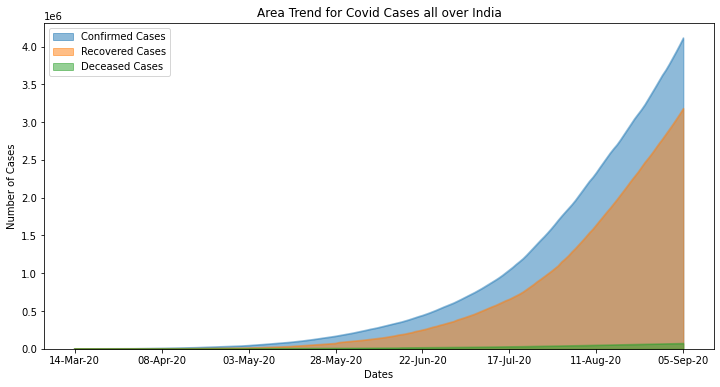


Q2_2


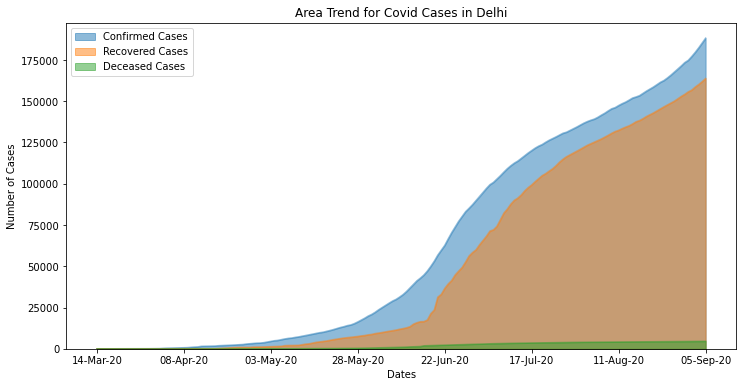


Q2_3


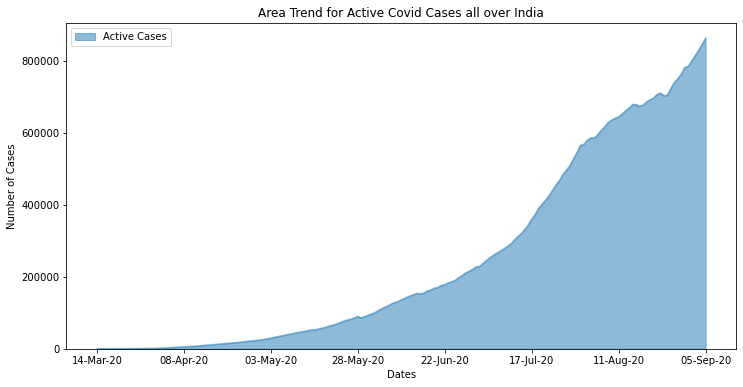


Q3
Normal Equation Method:

Slope of confirmed cases: [12.21426921]
Intercept of confirmed cases: [-11.68441558]


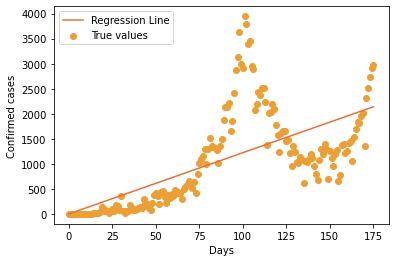

Slope of recovered cases: [12.30552829]
Intercept of recovered cases: [-158.44266234]


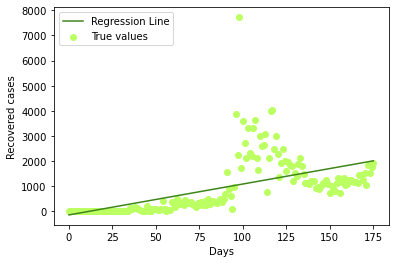

Slope of deceased cases: [0.19023333]
Intercept of deceased cased: [8.94844156]


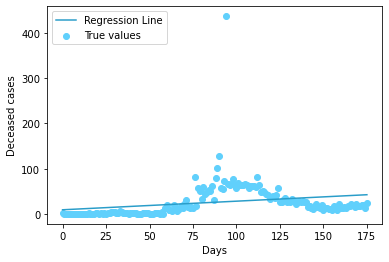

Using Gradient Descent Method:

Slope of confirmed cases: 11.640591492755062
Intercept of confirmed cases: 23.28118298551012


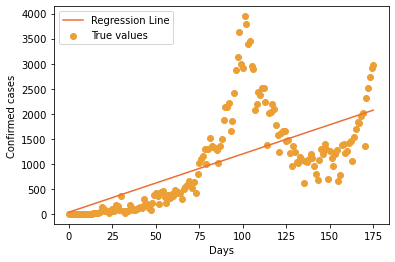

Slope of recovered cases: 10.130845874399617
Intercept of recovered cases: 20.26169174879925


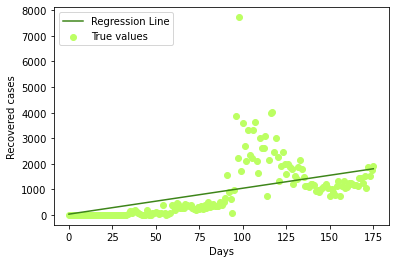

Slope of deceased cases: 0.2806959036421252
Intercept of deceased cased: 0.5613918072842509


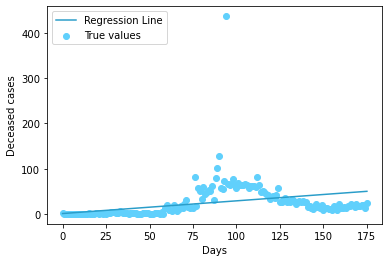

In [91]:
if __name__ == "__main__":
    # execute only if run as a script
    print('MT19069 \nMT19063') # Please put this first
    start_date = "2020-03-14"
    end_date = "2020-09-05"
    print('\nQ1_1')
    Q1_1('states_daily.json', start_date, end_date)
    print('\nQ1_2')
    Q1_2('states_daily.json', start_date, end_date)
    print('\nQ1_3')
    Q1_3('states_daily.json', start_date, end_date)
    print('\nQ1_4')
    Q1_4('states_daily.json', start_date, end_date)
    print('\nQ1_5')
    Q1_5('states_daily.json', start_date, end_date)
    print('\nQ1_6')
    Q1_6('states_daily.json', start_date, end_date)
    print('\nQ1_7')
    Q1_7('states_daily.json', start_date, end_date)
    print('\nQ2_1')
    Q2_1('states_daily.json', start_date, end_date)
    print('\nQ2_2')
    Q2_2('states_daily.json', start_date, end_date)
    print('\nQ2_3')
    Q2_3('states_daily.json', start_date, end_date)
    print('\nQ3')
    Q3('states_daily.json',start_date,end_date)
#... Rest of the functions